In [293]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [294]:
df = pd.read_csv('winequalityN.csv')
df = df.dropna()
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [295]:
#df_wine = pd.DataFrame(df, 
#                columns=['type','fixed acidity', 'volatile acidity', 'citric acid',
#       'residual sugar', 'chlorides', 'free sulfur dioxide',
#       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
df_wine = pd.DataFrame(df)

In [296]:
df_wine.isnull().sum()
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [297]:
def myfunctiontype(t):
    if t == "red":
        return 0
    elif t == "white":
        return 1
    else:
        return 2
    
df_wine["type"] = df_wine["type"].apply(myfunctiontype)
df_wine.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,1,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [298]:
def myfunctionquality(q):
    if q >=0 and q < 4:
        return 0
    elif q > 4 and q <7:
        return 1
    else:
        return 2
    
df_wine["quality"] = df_wine["quality"].apply(myfunctionquality)
df_wine.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
5,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
7,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
8,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
9,1,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


In [299]:
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [300]:
df_wine.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,1
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1
6496,0,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,1


In [301]:
df_wine.type.value_counts()

1    4870
0    1593
Name: type, dtype: int64

In [302]:
df_wine.dtypes

type                      int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [303]:
x = df_wine.iloc[:,1:12]

y = df_wine['quality']
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# Visualization

In [304]:
#to view data as csv after binning
#df_wine.to_csv('winetest.csv')
df_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


# PCA

In [305]:
#sb.pairplot (df_wine, hue='quality', bw=1.5)
#plt.show()

[0.3176715  0.21069888 0.12999856 0.08094213 0.06034393 0.0510322 ]
0.8506871987742373


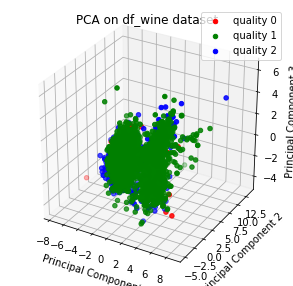

In [306]:
y = df_wine.loc[:,'quality'].values
x = StandardScaler().fit_transform(df_wine.iloc[:,0:12])

pca = PCA(n_components=6)
pc = pca.fit_transform(x)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

colors = 'rgbmykc'

fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')

for i in np.unique(y):
    ax.scatter3D(pc[y==i,0], pc[y==i,1],
             pc[y==i,2], color=colors[i],
               label='quality ' + str(i))

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.legend()
plt.title('PCA on df_wine dataset')
plt.show()

# DBSCAN

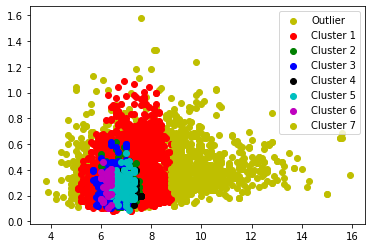

In [307]:
x = df_wine.iloc[:, [1,2,3,4,5]].values

dbscan = DBSCAN(eps=0.35, min_samples = 50)
clusters = dbscan.fit_predict(x)

colors = 'rgbkcmy'

for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    plt.scatter(x[clusters==i,0], x[clusters==i,1],
                color=colors[i], label=label)

plt.legend()
plt.show()

# Kmeans

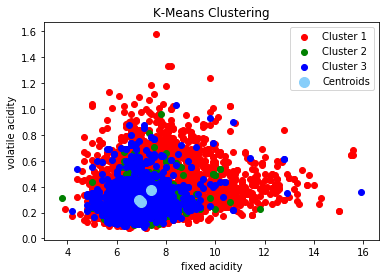

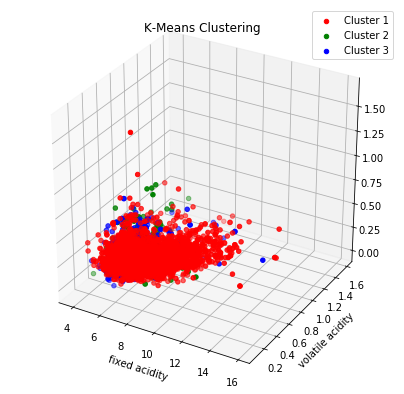

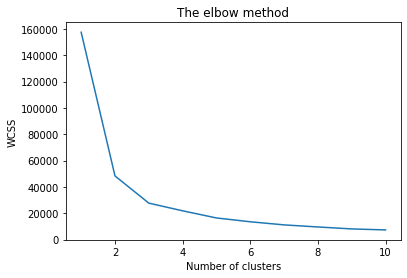

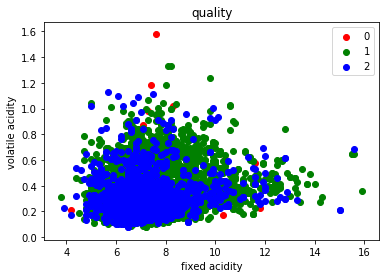

In [308]:
#Part 1
x = df_wine.iloc[:, [1,2,3,4]].values

#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(x)

#2D plot
colors = 'rgbkcmy'

for i in np.unique(clusters):
    plt.scatter(x[clusters==i,0], x[clusters==i,1],
                color=colors[i], label='Cluster ' + str(i + 1))

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s=100, c='lightskyblue', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel(df_wine.columns[1])
plt.ylabel(df_wine.columns[2])
plt.show()


#3D plot
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    ax.scatter3D(x[clusters==i,0],
             x[clusters==i,1],
             x[clusters==i,2],
                 color=colors[i], label='Cluster ' + str(i + 1))

ax.set_xlabel(df_wine.columns[1])
ax.set_ylabel(df_wine.columns[2])

plt.legend()
plt.title('K-Means Clustering')
plt.show()



#Part 2: Find the optimum number of clusters for k-means
from sklearn.cluster import KMeans

wcss = []

# Trying kmeans for k=1 to k=10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within cluster sum of squares
plt.show()


# Part 3: Actual Categorization
quality = np.reshape(df_wine.loc[:, ['quality']].values, (-1,))
i = 0
for label in np.unique(quality):
    plt.scatter(x[quality==label,0], x[quality==label,1],
                color=colors[i], label=label)
    i += 1

plt.legend()
plt.title('quality')
plt.xlabel(df_wine.columns[1])
plt.ylabel(df_wine.columns[2])
plt.show()

# Model Training

# Predicting for quality

In [311]:
#this is for predicting quality

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 100, train_size=0.7)

In [312]:
x_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [313]:
knn_model = KNeighborsClassifier(n_neighbors = 50) 

knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [314]:
y_pred = knn_model.predict(x_test)

In [315]:
print(accuracy_score(y_test, y_pred))

0.7648272305312016


In [ ]:
print(y_pred)

# Predicting for Type

In [316]:
x2 = df_wine.iloc[:, 0:12]
y2 = df_wine['type']
x2

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [317]:
#this is for predicting type

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state = 100, train_size=0.7)

In [318]:
knn_model = KNeighborsClassifier(n_neighbors = 50) 

knn_model.fit(x2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [319]:
y2_pred = knn_model.predict(x2_test)

In [320]:
print(accuracy_score(y2_test, y2_pred))

0.9283135636926251
